/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


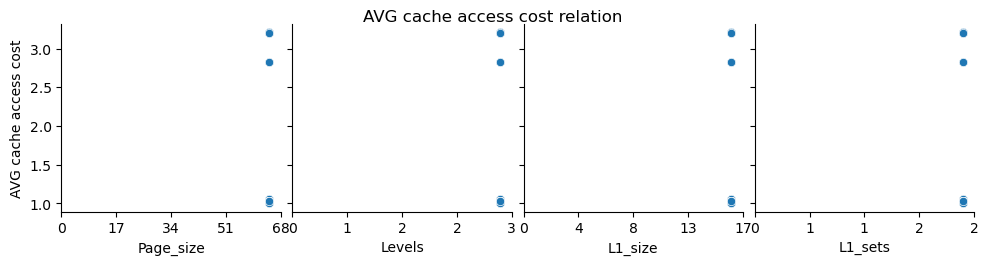

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


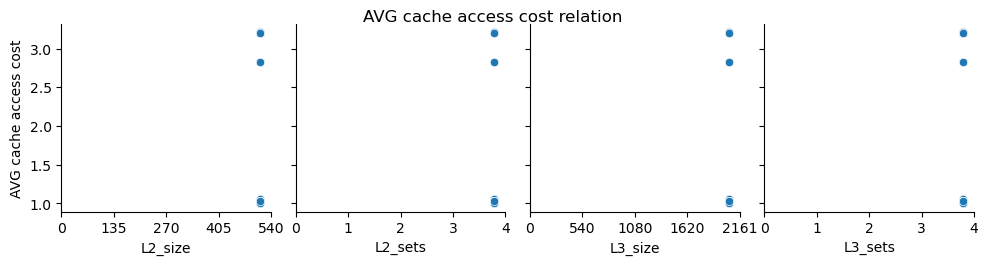

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


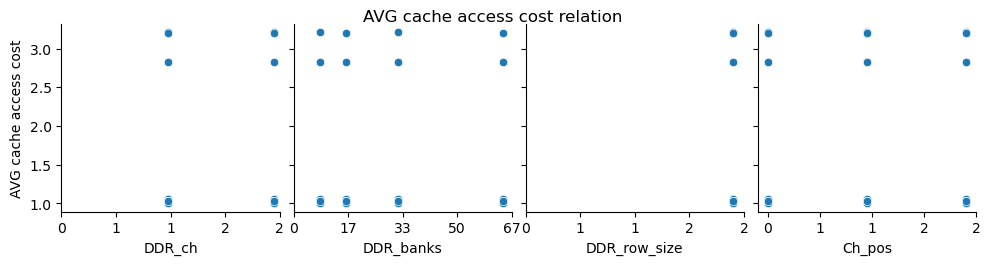

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


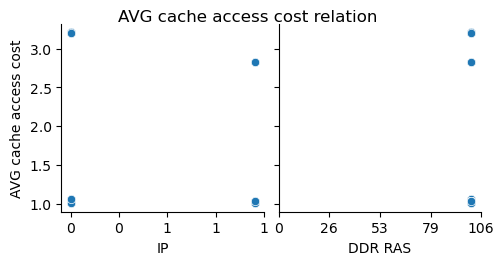

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


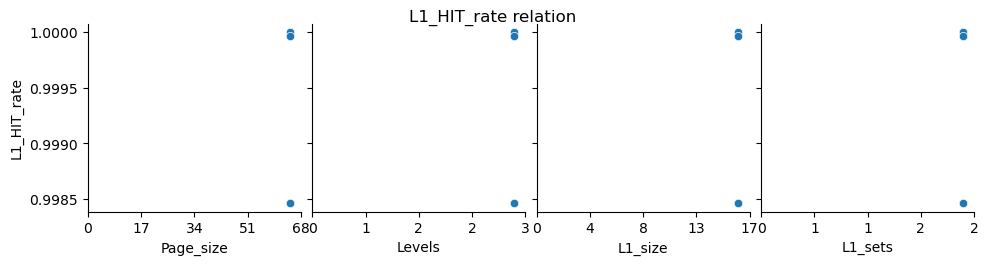

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


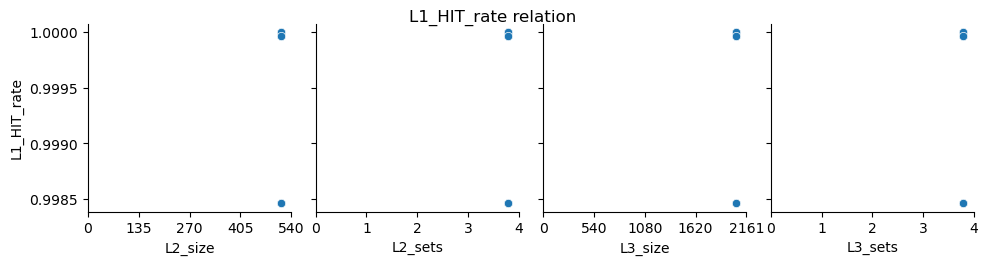

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


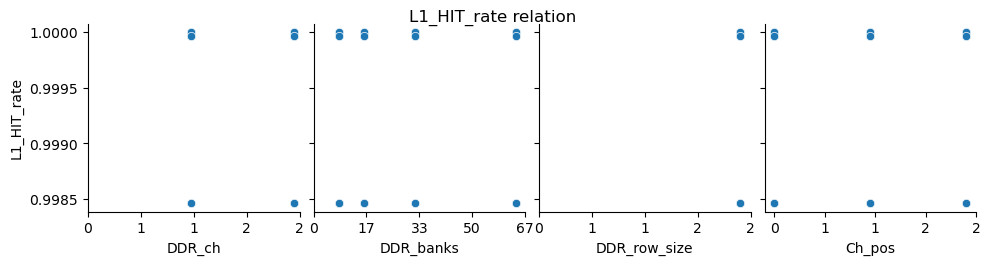

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


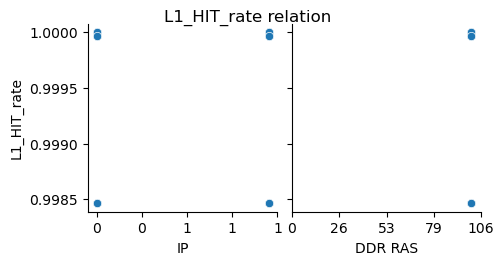

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


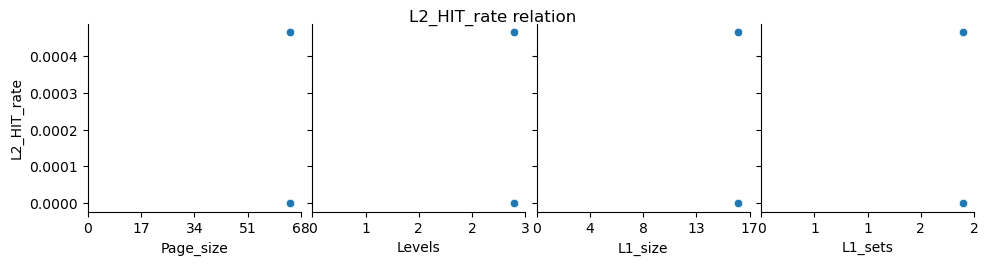

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


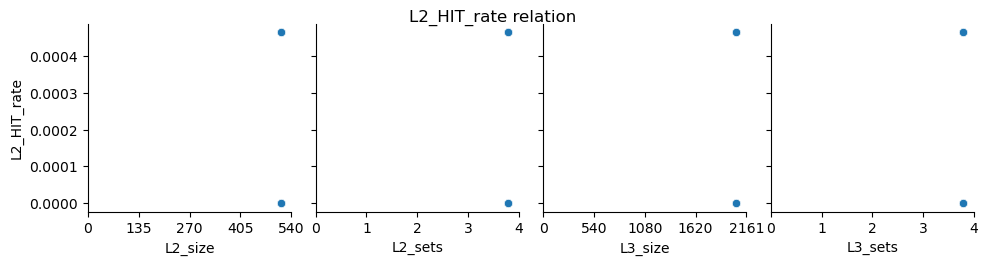

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


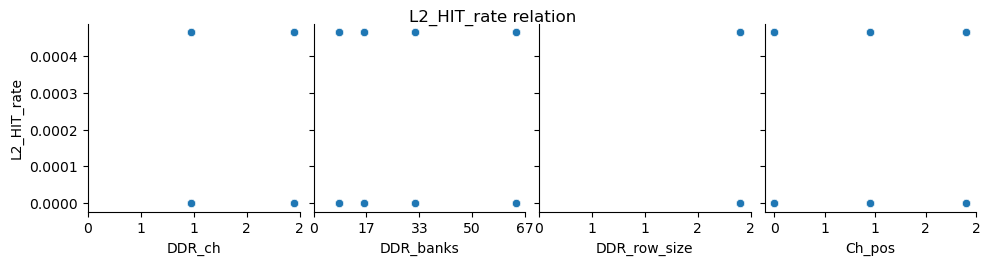

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


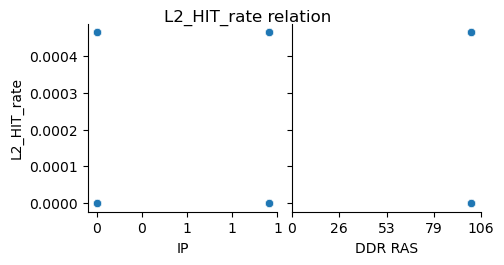

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


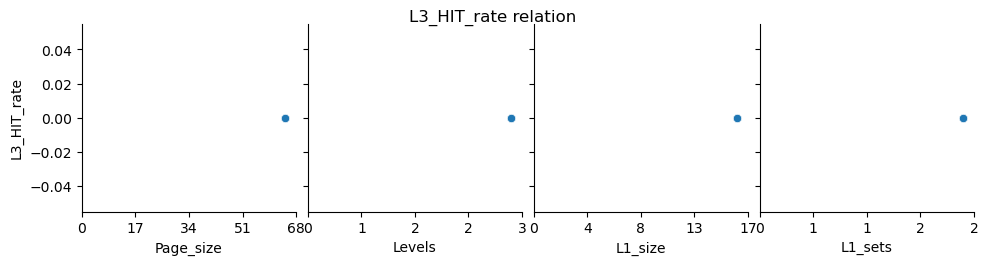

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


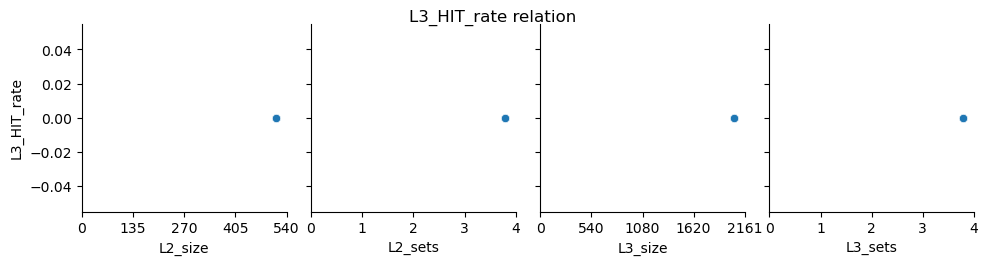

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


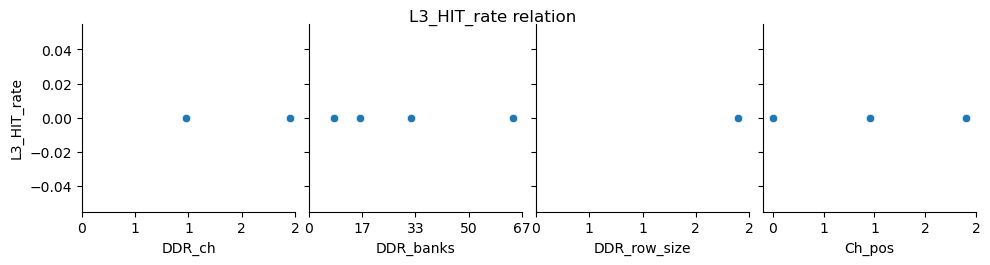

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


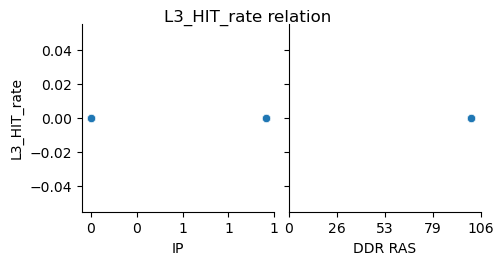

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


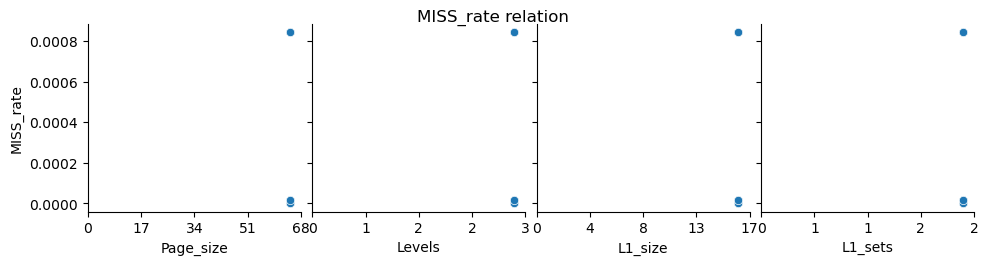

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


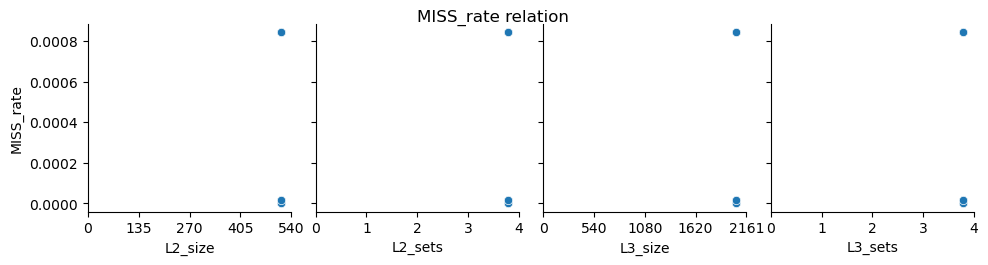

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


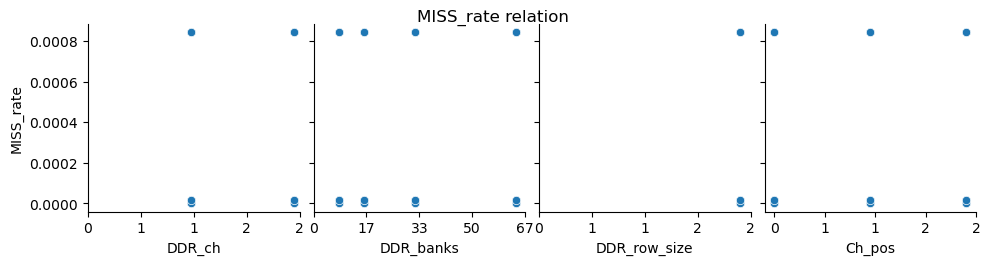

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


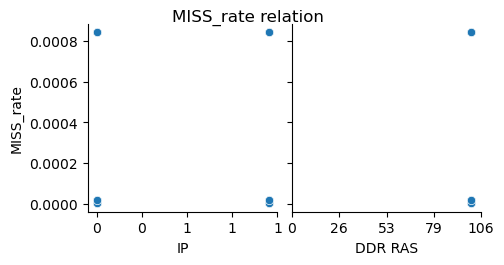

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


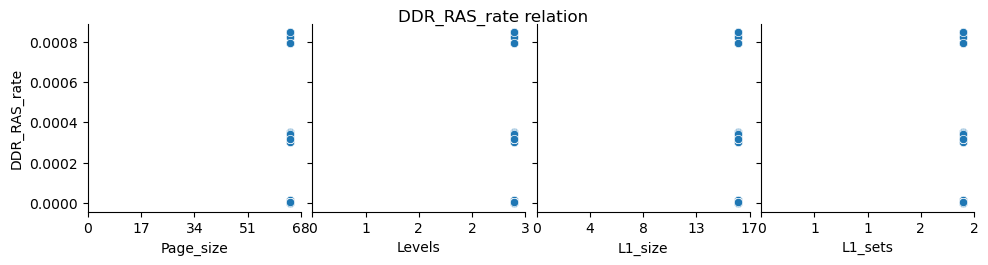

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


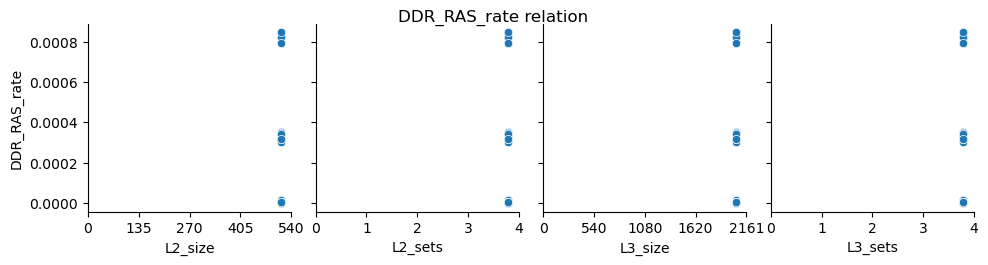

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


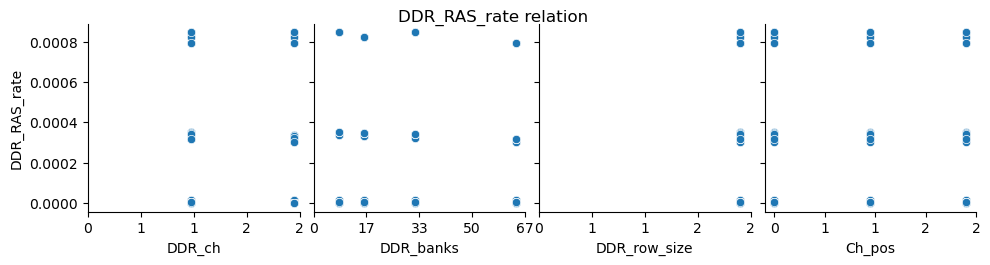

/Users/boss/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


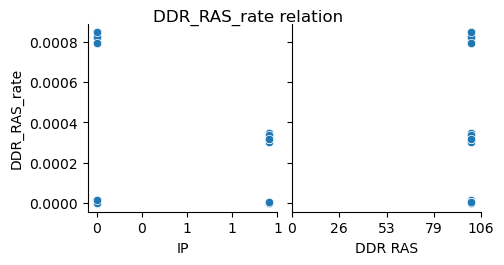

In [46]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

subplots_in_row = 4

data = pd.read_csv('./logs/Cache_simulator_statistic.csv', delimiter=';')

# print(data.head())

columns = data.columns

y1 = columns[-1]
y2 = columns[-2]
y3 = columns[-3]
y4 = columns[-4]
y5 = columns[-5]
y6 = columns[-6]
y7 = columns[-7]
y8 = columns[-8]
y9 = columns[-9]
y10 = columns[-10]
y11 = columns[-11]
y12 = columns[-12]

pairplot_columns = columns[:-12]
filtered_columns = [col for col in pairplot_columns if data[col].items()] # all plots
# filtered_columns = [col for col in pairplot_columns if data[col].nunique() > 1] # two or more system parameter changed

def create_pairplots(data, pairplot_columns, y_var, group_size=subplots_in_row):
    n = len(pairplot_columns)
    for i in range(0, n, group_size):
        current_columns = pairplot_columns[i:i + group_size]
        pairplot = sns.pairplot(data=data, y_vars=[y_var], x_vars=current_columns)
        
        for ax in pairplot.axes.flatten():
            if ax.get_xlim()[1] > 0:
                xticks = np.linspace(0, ax.get_xlim()[1], 5)
                ax.set_xticks(xticks)
                ax.set_xticklabels([f'{tick:.0f}' for tick in xticks])
        
        plt.suptitle(f'{y_var} relation', y=1.02)
        plt.show()
    
    
## Comment not needed plots
create_pairplots(data, filtered_columns, y1)# AVG chace access cost
create_pairplots(data, filtered_columns, y12)# L1 HIT rate
create_pairplots(data, filtered_columns, y11)# L2 HIT rate
create_pairplots(data, filtered_columns, y10)# L3 HIT rate
create_pairplots(data, filtered_columns, y9)# MISS rate
# create_pairplots(data, filtered_columns, y8)# L1 write back rate
# create_pairplots(data, filtered_columns, y7)# L2 write back rate
# create_pairplots(data, filtered_columns, y6)# L3 write back rate
# create_pairplots(data, filtered_columns, y5)# L2 swap rate
# create_pairplots(data, filtered_columns, y4)# L3 swap rate
# create_pairplots(data, filtered_columns, y3)# CAS rate
create_pairplots(data, filtered_columns, y2)# RAS rate